In [1]:
import zipfile
import os

zip_path = '/content/archive2.zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Optional: List the directory to verify
os.listdir(extract_path)


['with_mask', 'without_mask']

In [3]:
!pip install split-folders

import splitfolders

input_folder = '/content/dataset'
output_folder = '/content/split_data'

# Split with 80% training and 20% validation
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2))


Copying files: 3833 files [00:01, 3511.84 files/s]


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/split_data/train'
val_dir = '/content/split_data/val'

img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 3066 images belonging to 2 classes.
Found 767 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load base VGG16 model with pretrained ImageNet weights
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False  # Freeze base

# Add custom classification head
x = vgg_base.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

vgg16_model = Model(inputs=vgg_base.input, outputs=output)

vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

vgg16_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,561,282 (105.14 MB)

 Trainable params: 12,846,594 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
print("\n🔧 Training VGG16...")
vgg16_history = vgg16_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)



🔧 Training VGG16...
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2026s 21s/step - accuracy: 0.8837 - loss: 0.2729 - val_accuracy: 0.9831 - val_loss: 0.0521
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2042s 21s/step - accuracy: 0.9925 - loss: 0.0325 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1996s 21s/step - accuracy: 0.9932 - loss: 0.0298 - val_accuracy: 0.9831 - val_loss: 0.0461
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2002s 21s/step - accuracy: 0.9957 - loss: 0.0153 - val_accuracy: 0.9896 - val_loss: 0.0353
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2003s 21s/step - accuracy: 0.9980 - loss: 0.0107 - val_accuracy: 0.9831 - val_loss: 0.0410
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2059s 21s/step - accuracy: 0.9955 - loss: 0.0097 - val_accuracy: 0.9909 - val_loss: 0.0404
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1998s 21s/step - accuracy: 0.9982 - loss: 0.0065 - val_accuracy: 0.9870 - val_loss: 0.0383
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1999s 21s/step - accuracy: 0.9995 - lo

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

# --- MobileNetV2 ---
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

mobilenet_model = Model(inputs=base_model.input, outputs=predictions)
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

print("\n🔧 Training MobileNetV2...")
mobilenet_history = mobilenet_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)



🔧 Training MobileNetV2...
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.7649 - loss: 0.4705 - val_accuracy: 0.9791 - val_loss: 0.0824
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.9627 - loss: 0.1040 - val_accuracy: 0.9896 - val_loss: 0.0494
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9741 - loss: 0.0724 - val_accuracy: 0.9922 - val_loss: 0.0394
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9806 - loss: 0.0556 - val_accuracy: 0.9922 - val_loss: 0.0322
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.9913 - loss: 0.0340 - val_accuracy: 0.9922 - val_loss: 0.0297
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9868 - loss: 0.0325 - val_accuracy: 0.9948 - val_loss: 0.0259
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.9926 - loss: 0.0257 - val_accuracy: 0.9948 - val_loss: 0.0244
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.9890 - loss: 0.0289

In [11]:
mobilenet_model.save("/content/mobilenet_model.h5")
vgg15_model.save("/content/vgg15_model.h5")


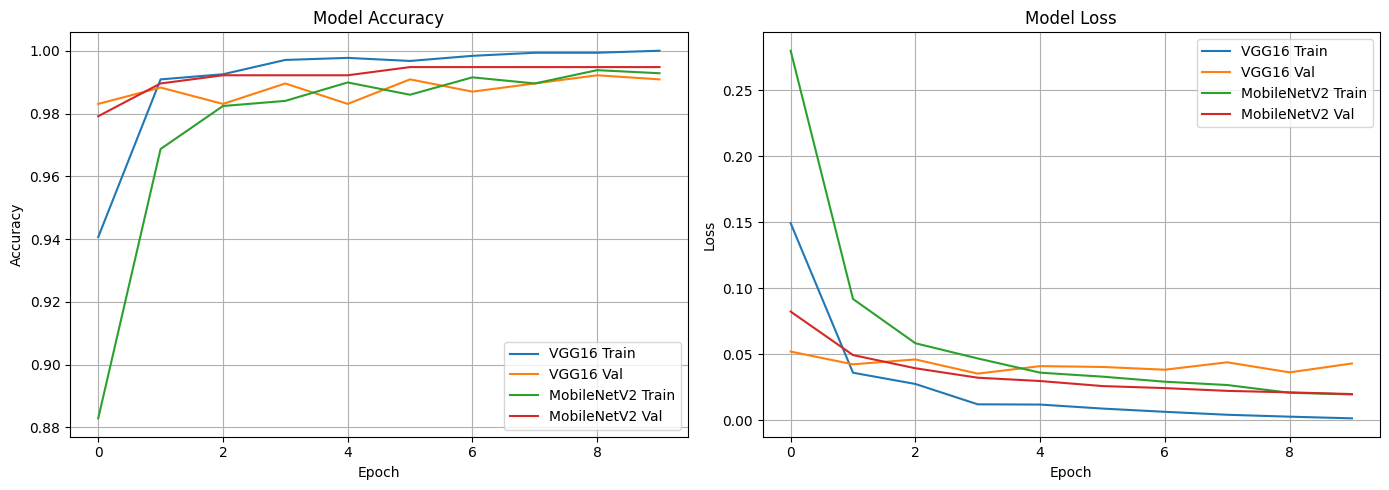

In [12]:
import matplotlib.pyplot as plt

def plot_history(vgg_history, mobile_history):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(vgg_history.history['accuracy'], label='VGG16 Train')
    plt.plot(vgg_history.history['val_accuracy'], label='VGG16 Val')
    plt.plot(mobile_history.history['accuracy'], label='MobileNetV2 Train')
    plt.plot(mobile_history.history['val_accuracy'], label='MobileNetV2 Val')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(vgg_history.history['loss'], label='VGG16 Train')
    plt.plot(vgg_history.history['val_loss'], label='VGG16 Val')
    plt.plot(mobile_history.history['loss'], label='MobileNetV2 Train')
    plt.plot(mobile_history.history['val_loss'], label='MobileNetV2 Val')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_history(vgg16_history, mobilenet_history)


In [13]:
print("📌 Final Evaluation on Validation Set")

vgg_eval = vgg16_model.evaluate(val_generator, verbose=0)
mobile_eval = mobilenet_model.evaluate(val_generator, verbose=0)

print(f"VGG16       - Accuracy: {vgg_eval[1]*100:.2f}%, Loss: {vgg_eval[0]:.4f}")
print(f"MobileNetV2 - Accuracy: {mobile_eval[1]*100:.2f}%, Loss: {mobile_eval[0]:.4f}")


📌 Final Evaluation on Validation Set
VGG16       - Accuracy: 99.09%, Loss: 0.0430
MobileNetV2 - Accuracy: 99.48%, Loss: 0.0198
